# Chest X-Ray Images (Pneumonia)

Artificial intelligence (AI) has the potential to revolutionize disease diagnosis and management by performing classification difficult for human experts and by rapidly reviewing immense amounts of images. Despite its potential, clinical interpretability and feasible preparation of AI remains challenging.
Dataset available at: https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data

The dataset is organized into 3 folders (train, test, eval) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

![](pneumonia_01.png)

In [1]:
from __future__ import print_function, division

#import libraries
import torch
import numpy as np
import os
from torchvision import datasets, models
import torchvision.transforms as transforms


import pandas as pd
from skimage import io, transform
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()

In [2]:
##Mock code to read data from CSV
myroot='C:/Users/Kevin.Diaz.nscorp/Documents/GitHub/AI-stuff/Pneumonia_Challenge/'
landmarks_frame = pd.read_csv(myroot+'/rsna-pneumonia-detection-challenge/stage_2_train_labels.csv')
n=22
img_name = landmarks_frame.iloc[n, 0]
landmarks= landmarks_frame.iloc[n, 1:5].as_matrix()
landmarks =  landmarks.astype('float')#.reshape(-1, 2)

print('image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('X:{} Y:{} W:{} H:{} landmarks'.format(landmarks[0],landmarks[1],landmarks[2],landmarks[3]))

image name: 0100515c-5204-4f31-98e0-f35e4b00004a
Landmarks shape: (4,)
X:703.0 Y:416.0 W:84.0 H:77.0 landmarks


In [3]:
import matplotlib.patches as patches
#from PIL import Image

def show_box(image, landmarks):
    """Show image with box detailing where pneumonia is located"""
    x=landmarks[0]
    y=landmarks[1]
    W=landmarks[2]
    H=landmarks[3]
    #create figure and axes
    #fig,ax = plt.subplots(1)
    #display the image
    plt.imshow(image)
    #Create rectangle                        For top left corner
    plt.gca().add_patch(patches.Rectangle((x,y-H),W,H,linewidth=1, fill=False))

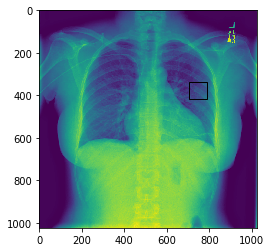

In [4]:
plt.figure()
show_box(io.imread(os.path.join(myroot+'rsna-pneumonia-detection-challenge/train_jpg/',
                                '0100515c-5204-4f31-98e0-f35e4b00004a.jpg')),landmarks)
plt.show()

In [5]:
class PneumoniaDataset(Dataset):
    """Pneumonia dataset"""
    
    def __init__(self,csv_file,root_dir,transform=None):
        """
        Args:
            csv_file(string): Path to the csv with annotations.
            root_dir(string): Directory with all images.
            transform (callable, optional): Optional transform to be applied on a sample
        """
        
        self.landmarks_frame = pd.read_csv(csv_file) #landmark cooridantes for xray with pneumonia
        self.root_dir = root_dir
        self.transform = transform
        
        def __len__(self):
            #print(len(self.landmarks_frame))
            return len(self.landmarks_frame)
        
        def __getitem__(self,idx):
            if torch.is_tensor(idx):
                idx=idx.tolist()
                
            img_name = os.path.join(self.root_dir,self.landmarks_frame.iloc[idx,0])
            image = io.imread(img_name)
            landmarks = self.landmarks_frame.iloc[idx,1:]
            landmarks = np.array([landmarks])
            landmarks = landmarks.astype('float').reshape(-1,2)
            sample = {'image': image, 'landmarks': landmarks}
            
            if self.transform:
                sample = self.transform(sample)
            return sample

In [7]:
##Setting train fodler with images and csv file

myroot='C:/Users/Kevin.Diaz.nscorp/Documents/GitHub/AI-stuff/Pneumonia_Challenge/'
pneumonia_dataset=PneumoniaDataset(csv_file=myroot+'/rsna-pneumonia-detection-challenge/stage_2_train_labels.csv', 
                                   root_dir=myroot+'/rsna-pneumonia-detection-challenge/train_jpg/')

In [13]:
train_data=datasets.ImageFolder

TypeError: object of type 'PneumoniaDataset' has no len()

In [8]:
## Attempt to display images with dots
fig=plt.figure()

for i in range(len(pneumonia_dataset)):
    sample = pneumonia_dataset[i]
    print(i, sample['image'].shape, sample['landmarks'.shape])
    
    ax.plt.subplot(1,4,i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_box(**sample)
    
    if i ==3:
        plt.show()
        break

TypeError: object of type 'PneumoniaDataset' has no len()

<Figure size 432x288 with 0 Axes>

In [3]:
#Transforms
#number of subprocesses to use for data loading
num_workers=0
#how many samples per batch to load
batch_size=20

#convert data to torch.FloatTensor
#transform= transforms.ToTensor()
transformers = {'train_transforms' : transforms.Compose([
    transforms.Resize((224,224)),
    #transforms.CenterCrop(224),
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
]),
'test_transforms' : transforms.Compose([
    transforms.Resize((224,224)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
]),
'valid_transforms' : transforms.Compose([
    transforms.Resize((224,224)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])}

#Setting training and test datasets
#os_gen_path='C:/Users/Kevin.Diaz.nscorp/Documents/GitHub/AI-stuff/Pneumonia_Challenge/rsna-pneumonia-detection-challenge'
train_data_dir='/rsna-pneumonia-detection-challenge/train_jpg'
test_data_dir='/rsna-pneumonia-detection-challenge/test_jpg'


In [4]:
#prepare dataloaders
train_loader = torch.utils.data.DataLoader(train_data_dir, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data_dir, batch_size=batch_size, num_workers=num_workers)

In [5]:
#Visualizing data
import matplotlib.pyplot as plt
%matplotlib inline

#Obtain one batch of training images
dataiter = iter(train_loader)
images=dataiter.next()
images=images.numpy()

#plot the images on the batch, along with labels?
fig=plt.figure(figsize=(25,4))
for idx in np.arange(20):
    ax=fig.add_subplot(2,20/2,idx+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    #print out the correct label for each image
    #.item() gets the value containged n a Tensor
    
    

AttributeError: 'list' object has no attribute 'numpy'